In [40]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-baseline-3.30-cpumanager.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccstream,9,16,3,3,2022-03-30T08:46:53Z,2022-03-30T08:47:00Z,2022-03-30T08:48:43Z,2022-03-30T08:48:43Z,2m33.154096437s,6.462660
1,hpccfft,5,16,4,4,2022-03-30T08:47:53Z,2022-03-30T08:48:01Z,2022-03-30T08:55:14Z,2022-03-30T08:55:19Z,8m4.35890447s,0.538697
2,hpccfft,7,16,4,4,2022-03-30T08:47:53Z,2022-03-30T08:48:01Z,2022-03-30T08:55:20Z,2022-03-30T08:55:22Z,8m4.17680959s,0.529172
3,hpccptrans,5,16,3,3,2022-03-30T08:48:54Z,2022-03-30T08:49:05Z,2022-03-30T08:59:20Z,2022-03-30T08:59:21Z,11m2.195024882s,0.084069
4,hpccptrans,1,16,3,3,2022-03-30T08:48:54Z,2022-03-30T08:49:03Z,2022-03-30T08:59:21Z,2022-03-30T08:59:21Z,11m12.125903191s,0.075195
...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30T08:56:20Z,2022-03-30T09:23:12Z,2022-03-30T09:29:36Z,2022-03-30T09:29:37Z,33m57.249614039s,0.546801
66,hpccptrans,9,16,4,4,2022-03-30T08:58:20Z,2022-03-30T09:13:49Z,2022-03-30T09:23:49Z,2022-03-30T09:23:51Z,26m6.124473015s,0.097134
67,hpccfft,9,16,3,3,2022-03-30T08:59:21Z,2022-03-30T09:23:43Z,2022-03-30T09:30:25Z,2022-03-30T09:30:25Z,31m45.149559074s,0.386494
68,hpccrandomaccess,0,16,4,4,2022-03-30T09:01:21Z,2022-03-30T09:24:30Z,2022-03-30T09:31:03Z,2022-03-30T09:31:03Z,30m25.144109912s,0.026822


In [41]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [42]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [43]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccstream,9,16,3,3,2022-03-30 08:46:53+00:00,2022-03-30 08:47:00+00:00,2022-03-30 08:48:43+00:00,2022-03-30 08:48:43+00:00,0 days 00:02:33.154096437,6.462660,0 days 00:00:07,0 days 00:01:43,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-30 08:47:53+00:00,2022-03-30 08:48:01+00:00,2022-03-30 08:55:14+00:00,2022-03-30 08:55:19+00:00,0 days 00:08:04.358904470,0.538697,0 days 00:00:08,0 days 00:07:13,0 days 00:00:05
2,hpccfft,7,16,4,4,2022-03-30 08:47:53+00:00,2022-03-30 08:48:01+00:00,2022-03-30 08:55:20+00:00,2022-03-30 08:55:22+00:00,0 days 00:08:04.176809590,0.529172,0 days 00:00:08,0 days 00:07:19,0 days 00:00:02
3,hpccptrans,5,16,3,3,2022-03-30 08:48:54+00:00,2022-03-30 08:49:05+00:00,2022-03-30 08:59:20+00:00,2022-03-30 08:59:21+00:00,0 days 00:11:02.195024882,0.084069,0 days 00:00:11,0 days 00:10:15,0 days 00:00:01
4,hpccptrans,1,16,3,3,2022-03-30 08:48:54+00:00,2022-03-30 08:49:03+00:00,2022-03-30 08:59:21+00:00,2022-03-30 08:59:21+00:00,0 days 00:11:12.125903191,0.075195,0 days 00:00:09,0 days 00:10:18,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30 08:56:20+00:00,2022-03-30 09:23:12+00:00,2022-03-30 09:29:36+00:00,2022-03-30 09:29:37+00:00,0 days 00:33:57.249614039,0.546801,0 days 00:26:52,0 days 00:06:24,0 days 00:00:01
66,hpccptrans,9,16,4,4,2022-03-30 08:58:20+00:00,2022-03-30 09:13:49+00:00,2022-03-30 09:23:49+00:00,2022-03-30 09:23:51+00:00,0 days 00:26:06.124473015,0.097134,0 days 00:15:29,0 days 00:10:00,0 days 00:00:02
67,hpccfft,9,16,3,3,2022-03-30 08:59:21+00:00,2022-03-30 09:23:43+00:00,2022-03-30 09:30:25+00:00,2022-03-30 09:30:25+00:00,0 days 00:31:45.149559074,0.386494,0 days 00:24:22,0 days 00:06:42,0 days 00:00:00
68,hpccrandomaccess,0,16,4,4,2022-03-30 09:01:21+00:00,2022-03-30 09:24:30+00:00,2022-03-30 09:31:03+00:00,2022-03-30 09:31:03+00:00,0 days 00:30:25.144109912,0.026822,0 days 00:23:09,0 days 00:06:33,0 days 00:00:00


In [44]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [45]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,3,2022-03-30 08:46:53+00:00,2022-03-30 08:47:00+00:00,2022-03-30 08:48:43+00:00,2022-03-30 08:48:43+00:00,0 days 00:02:33.154096437,6.462660,0 days 00:00:07,0 days 00:01:43,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-30 08:47:53+00:00,2022-03-30 08:48:01+00:00,2022-03-30 08:55:14+00:00,2022-03-30 08:55:19+00:00,0 days 00:08:04.358904470,0.538697,0 days 00:00:08,0 days 00:07:13,0 days 00:00:05,2022-03-30 08:46:53+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-30 08:47:53+00:00,2022-03-30 08:48:01+00:00,2022-03-30 08:55:20+00:00,2022-03-30 08:55:22+00:00,0 days 00:08:04.176809590,0.529172,0 days 00:00:08,0 days 00:07:19,0 days 00:00:02,2022-03-30 08:46:53+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-30 08:48:54+00:00,2022-03-30 08:49:05+00:00,2022-03-30 08:59:20+00:00,2022-03-30 08:59:21+00:00,0 days 00:11:02.195024882,0.084069,0 days 00:00:11,0 days 00:10:15,0 days 00:00:01,2022-03-30 08:46:53+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-30 08:48:54+00:00,2022-03-30 08:49:03+00:00,2022-03-30 08:59:21+00:00,2022-03-30 08:59:21+00:00,0 days 00:11:12.125903191,0.075195,0 days 00:00:09,0 days 00:10:18,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30 08:56:20+00:00,2022-03-30 09:23:12+00:00,2022-03-30 09:29:36+00:00,2022-03-30 09:29:37+00:00,0 days 00:33:57.249614039,0.546801,0 days 00:26:52,0 days 00:06:24,0 days 00:00:01,2022-03-30 08:46:53+00:00,0 days 00:09:27
66,hpccptrans,9,16,4,4,2022-03-30 08:58:20+00:00,2022-03-30 09:13:49+00:00,2022-03-30 09:23:49+00:00,2022-03-30 09:23:51+00:00,0 days 00:26:06.124473015,0.097134,0 days 00:15:29,0 days 00:10:00,0 days 00:00:02,2022-03-30 08:46:53+00:00,0 days 00:11:27
67,hpccfft,9,16,3,3,2022-03-30 08:59:21+00:00,2022-03-30 09:23:43+00:00,2022-03-30 09:30:25+00:00,2022-03-30 09:30:25+00:00,0 days 00:31:45.149559074,0.386494,0 days 00:24:22,0 days 00:06:42,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:12:28
68,hpccrandomaccess,0,16,4,4,2022-03-30 09:01:21+00:00,2022-03-30 09:24:30+00:00,2022-03-30 09:31:03+00:00,2022-03-30 09:31:03+00:00,0 days 00:30:25.144109912,0.026822,0 days 00:23:09,0 days 00:06:33,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:14:28


In [46]:
df['benchmark'].unique()

array(['hpccstream', 'hpccfft', 'hpccptrans', 'hpccrandomringbw',
       'hpccrandomringlat', 'hpccdgemm', 'hpccrandomaccess'], dtype=object)

In [47]:
df['nWorkers'].unique()

array([3, 4, 1, 2])

#  performance

In [48]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [49]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccstream,16,3,3,6.197805,0.747552
0,hpccstream,16,2,2,4.850000,0.511417
0,hpccstream,16,1,1,4.091693,0.914258
0,hpccfft,16,4,4,0.503889,0.042668
0,hpccfft,16,1,1,11.746167,1.496015
0,hpccfft,16,2,2,0.529379,0.008212
0,hpccfft,16,3,3,0.466647,0.080153
0,hpccptrans,16,3,3,0.076190,0.012098
0,hpccptrans,16,1,1,4.895825,2.115045
0,hpccptrans,16,2,2,0.111161,0.038003


    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       3         3         6.197805        0.747552
0  hpccstream      16       2         2         4.850000        0.511417
0  hpccstream      16       1         1         4.091693        0.914258
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         0.503889        0.042668
0   hpccfft      16       1         1        11.746167        1.496015
0   hpccfft      16       2         2         0.529379        0.008212
0   hpccfft      16       3         3         0.466647        0.080153
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccptrans      16       3         3         0.076190        0.012098
0  hpccptrans      16       1         1         4.895825        2.115045
0  hpccptrans      16       2         2         0.111161        0.038003
0  hpccptrans      16       4         4         0.097134     

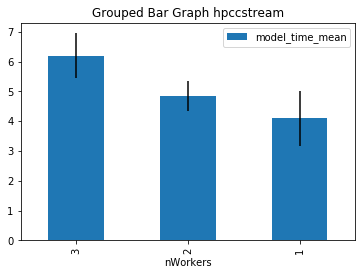

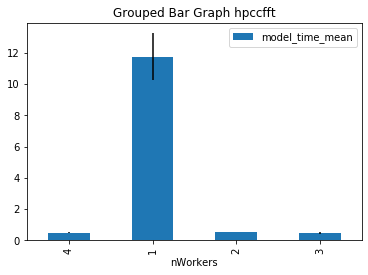

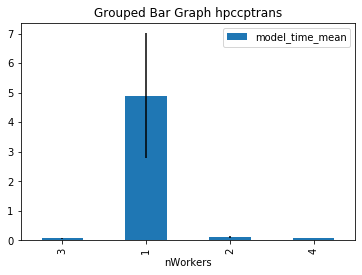

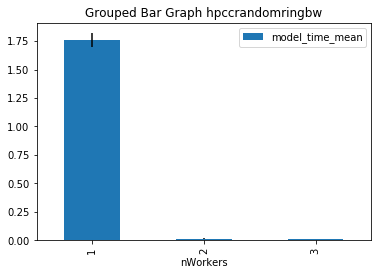

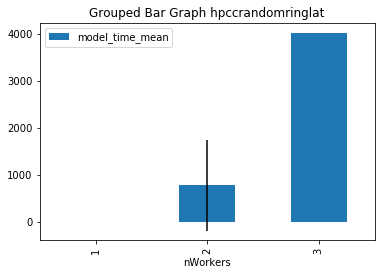

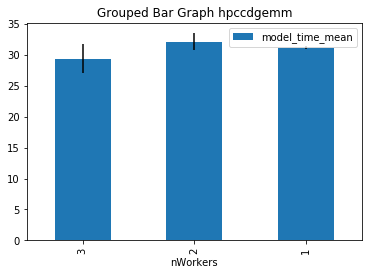

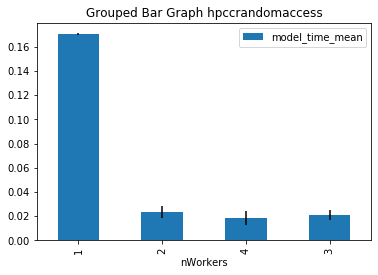

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [51]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [52]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccstream,16,3,3,0 days 00:08:33,0 days 00:07:51.660365093,0 days 00:01:46.750000,0 days 00:00:04.918078893,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:10:58.129308335,0 days 00:07:51.697352973
0,hpccstream,16,2,2,0 days 00:13:31.333333333,0 days 00:04:52.297033094,0 days 00:01:45.333333333,0 days 00:00:08.339997335,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:15:52.210892728,0 days 00:05:00.568035727
0,hpccstream,16,1,1,0 days 00:19:43,0 days 00:03:30.656117879,0 days 00:01:47.666666666,0 days 00:00:12.364824660,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:22:11.733197801,0 days 00:03:25.055759875
0,hpccfft,16,4,4,0 days 00:02:35,0 days 00:03:27.889393668,0 days 00:07:20.666666666,0 days 00:00:07.039570693,0 days 00:00:02.666666666,0 days 00:00:01.699673171,0 days 00:10:36.896111019,0 days 00:03:35.848959594
0,hpccfft,16,1,1,0 days 00:13:04,0 days 00:04:38.906196895,0 days 00:01:26.666666666,0 days 00:00:01.699673171,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:15:06.169505223,0 days 00:04:39.110255018
0,hpccfft,16,2,2,0 days 00:13:48.500000,0 days 00:06:18.500000,0 days 00:07:22,0 days 00:00:47,0 days 00:00:00,0 days 00:00:00,0 days 00:21:45.766970292,0 days 00:05:33.527897546
0,hpccfft,16,3,3,0 days 00:25:37,0 days 00:01:15,0 days 00:06:33,0 days 00:00:09,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:32:51.199586556,0 days 00:01:06.050027482
0,hpccptrans,16,3,3,0 days 00:02:30.250000,0 days 00:03:56.043825379,0 days 00:10:04.750000,0 days 00:00:30.646166155,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:13:14.401748976,0 days 00:04:13.177610395
0,hpccptrans,16,1,1,0 days 00:14:35,0 days 00:01:12,0 days 00:01:57.500000,0 days 00:00:12.500000,0 days 00:00:00,0 days 00:00:00,0 days 00:17:10.752423231,0 days 00:01:00.852575946
0,hpccptrans,16,2,2,0 days 00:13:35,0 days 00:03:07.842132299,0 days 00:07:23,0 days 00:01:14.636898828,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:21:39.740919546,0 days 00:02:01.792509526


<ipython-input-53-dbdb2ccec5d7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-dbdb2ccec5d7>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



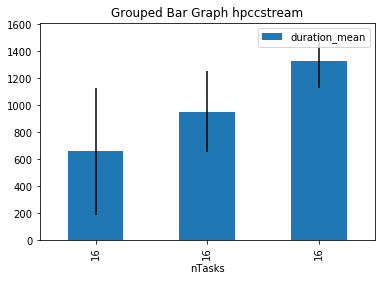

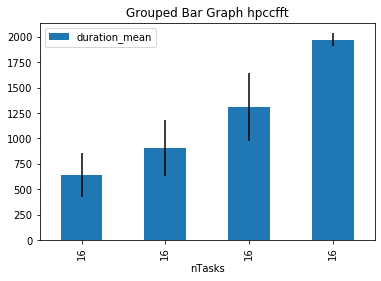

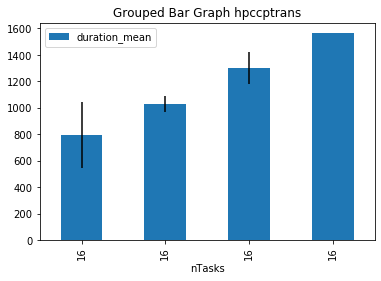

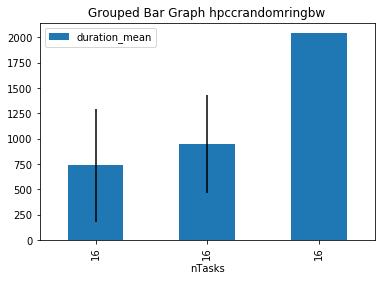

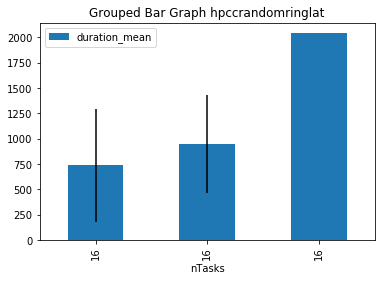

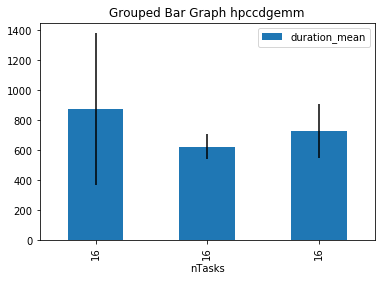

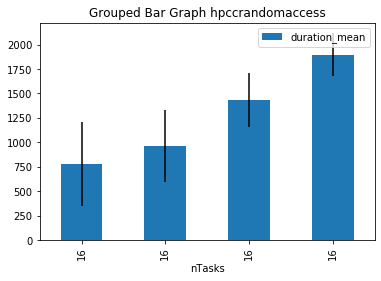

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [54]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [55]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccstream,16,8035.0,1066.0,4.0,9484.349505
0,hpccfft,16,7548.0,3252.0,10.0,11183.129962
0,hpccptrans,16,5725.0,4583.0,5.0,10704.459074
0,hpccrandomringbw,16,7420.0,1537.0,7.0,9317.255449
0,hpccrandomringlat,16,7420.0,1537.0,7.0,9317.255449
0,hpccdgemm,16,5095.0,2315.0,9.0,7797.873184
0,hpccrandomaccess,16,8740.0,3400.0,6.0,12527.883429


<ipython-input-56-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



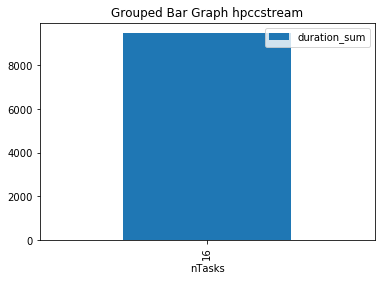

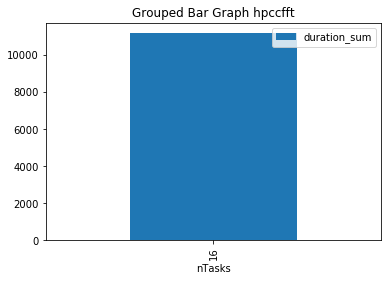

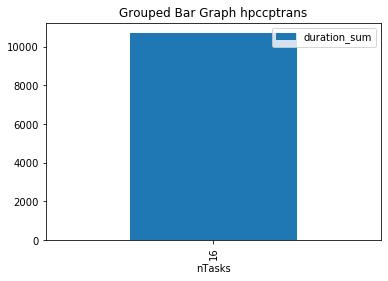

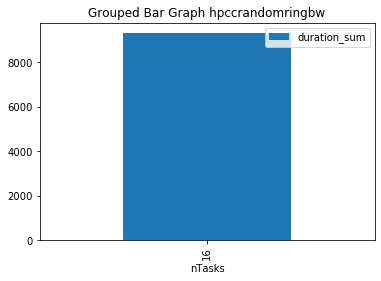

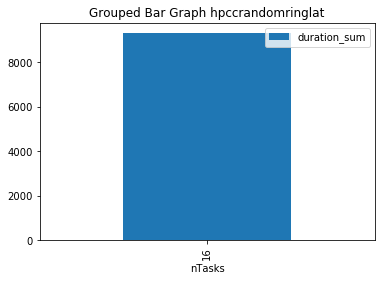

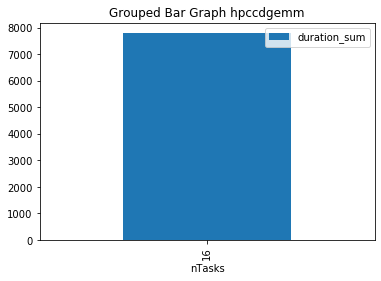

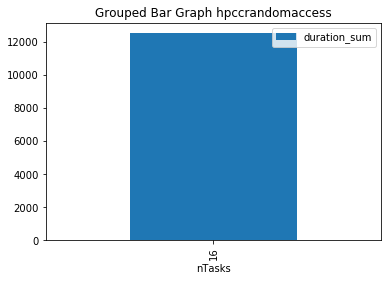

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [57]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccstream,9,16,3,3,2022-03-30 08:46:53+00:00,2022-03-30 08:47:00+00:00,2022-03-30 08:48:43+00:00,2022-03-30 08:48:43+00:00,0 days 00:02:33.154096437,6.462660,0 days 00:00:07,0 days 00:01:43,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:00:00
1,hpccfft,5,16,4,4,2022-03-30 08:47:53+00:00,2022-03-30 08:48:01+00:00,2022-03-30 08:55:14+00:00,2022-03-30 08:55:19+00:00,0 days 00:08:04.358904470,0.538697,0 days 00:00:08,0 days 00:07:13,0 days 00:00:05,2022-03-30 08:46:53+00:00,0 days 00:01:00
2,hpccfft,7,16,4,4,2022-03-30 08:47:53+00:00,2022-03-30 08:48:01+00:00,2022-03-30 08:55:20+00:00,2022-03-30 08:55:22+00:00,0 days 00:08:04.176809590,0.529172,0 days 00:00:08,0 days 00:07:19,0 days 00:00:02,2022-03-30 08:46:53+00:00,0 days 00:01:00
3,hpccptrans,5,16,3,3,2022-03-30 08:48:54+00:00,2022-03-30 08:49:05+00:00,2022-03-30 08:59:20+00:00,2022-03-30 08:59:21+00:00,0 days 00:11:02.195024882,0.084069,0 days 00:00:11,0 days 00:10:15,0 days 00:00:01,2022-03-30 08:46:53+00:00,0 days 00:02:01
4,hpccptrans,1,16,3,3,2022-03-30 08:48:54+00:00,2022-03-30 08:49:03+00:00,2022-03-30 08:59:21+00:00,2022-03-30 08:59:21+00:00,0 days 00:11:12.125903191,0.075195,0 days 00:00:09,0 days 00:10:18,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:02:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,hpccfft,8,16,3,3,2022-03-30 08:56:20+00:00,2022-03-30 09:23:12+00:00,2022-03-30 09:29:36+00:00,2022-03-30 09:29:37+00:00,0 days 00:33:57.249614039,0.546801,0 days 00:26:52,0 days 00:06:24,0 days 00:00:01,2022-03-30 08:46:53+00:00,0 days 00:09:27
66,hpccptrans,9,16,4,4,2022-03-30 08:58:20+00:00,2022-03-30 09:13:49+00:00,2022-03-30 09:23:49+00:00,2022-03-30 09:23:51+00:00,0 days 00:26:06.124473015,0.097134,0 days 00:15:29,0 days 00:10:00,0 days 00:00:02,2022-03-30 08:46:53+00:00,0 days 00:11:27
67,hpccfft,9,16,3,3,2022-03-30 08:59:21+00:00,2022-03-30 09:23:43+00:00,2022-03-30 09:30:25+00:00,2022-03-30 09:30:25+00:00,0 days 00:31:45.149559074,0.386494,0 days 00:24:22,0 days 00:06:42,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:12:28
68,hpccrandomaccess,0,16,4,4,2022-03-30 09:01:21+00:00,2022-03-30 09:24:30+00:00,2022-03-30 09:31:03+00:00,2022-03-30 09:31:03+00:00,0 days 00:30:25.144109912,0.026822,0 days 00:23:09,0 days 00:06:33,0 days 00:00:00,2022-03-30 08:46:53+00:00,0 days 00:14:28


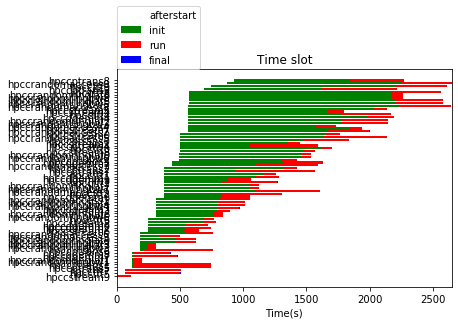

In [58]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
